In [1]:
from sampstrats import GaussianPRM
import random
import math
import copy
import heapq
import numpy as np
import networkx as nx
import IPPRMBase
import matplotlib.pyplot as plt
from IPPerfMonitor import IPPerfMonitor
import IPTestSuite

In [2]:
def basicPRMVisualize(graph, collChecker, solution, nodeSize=300.0, ax=None):
    # get a list of posiations of all nodes by returning the content of the attribute 'pos'
    pos = nx.get_node_attributes(graph,'pos')
    
    # draw graph (nodes colorized by degree)
    nx.draw_networkx_nodes(graph, pos,  cmap=plt.cm.Blues, ax = ax, node_size=nodeSize)
    nx.draw_networkx_edges(graph,pos,
                                ax = ax
                                )
    
   
    

    collChecker.drawObstacles(ax)
    
    
    # draw nodes based on solution path
    Gsp = nx.subgraph(graph,solution)
    nx.draw_networkx_nodes(Gsp,pos,
                            node_size=300,
                             node_color='g',  ax = ax)
        
    # draw edges based on solution path
    nx.draw_networkx_edges(Gsp,pos,alpha=0.8,edge_color='g',width=10,  ax = ax)
        
    # draw start and goal
    if "start" in graph.nodes(): 
        nx.draw_networkx_nodes(graph,pos,nodelist=["start"],
                                   node_size=300,
                                   node_color='#00dd00',  ax = ax)
    if "goal" in graph.nodes():
        nx.draw_networkx_nodes(graph,pos,nodelist=["goal"],
                                   node_size=300,
                                   node_color='#DD0000', ax = ax)

Planning:  Entrances
Failed No path between start and goal.
Planning:  KIT
Failed Either source start or target goal is not in G
Planning:  Inside
['start', 79, 32, 31, 45, 17, 18, 21, 19, 16, 15, 6, 3, 41, 25, 38, 43, 101, 185, 197, 'goal'] 21
301
Planning:  SSL
['start', 13, 37, 60, 86, 112, 102, 23, 44, 15, 24, 4, 20, 52, 39, 32, 49, 42, 45, 47, 50, 183, 151, 2, 12, 215, 'goal'] 27
301
Planning:  Ring
['start', 284, 80, 48, 4, 53, 32, 3, 1, 6, 17, 38, 49, 40, 26, 23, 'goal'] 17
301
Planning:  Hemispheres
Failed Either source start or target goal is not in G
Planning:  Hammerhead
['start', 217, 92, 73, 8, 24, 31, 30, 6, 4, 2, 1, 10, 12, 190, 170, 148, 16, 3, 5, 17, 25, 15, 21, 32, 27, 18, 20, 14, 23, 48, 59, 90, 'goal'] 34
301
Planning:  Zigzag
['start', 211, 122, 73, 57, 48, 98, 16, 13, 4, 14, 18, 38, 34, 30, 5, 19, 9, 59, 63, 90, 8, 20, 40, 49, 21, 109, 23, 29, 'goal'] 30
301
Planning:  Spiral
['start', 225, 108, 28, 16, 62, 110, 61, 189, 100, 69, 6, 51, 8, 38, 32, 25, 27, 20, 75, 

C:\Users\Philipp\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

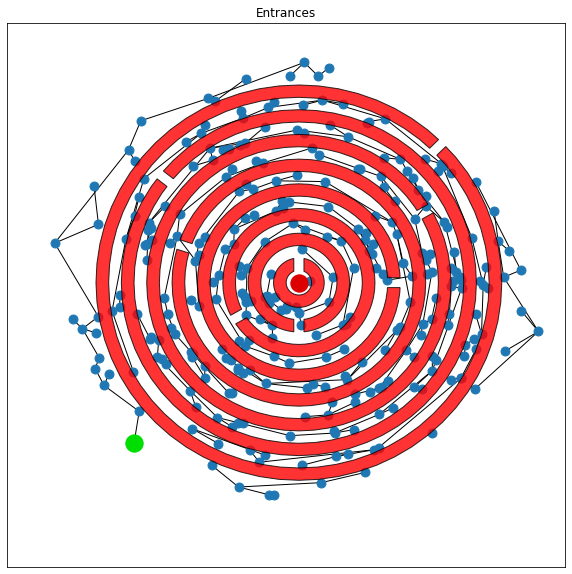

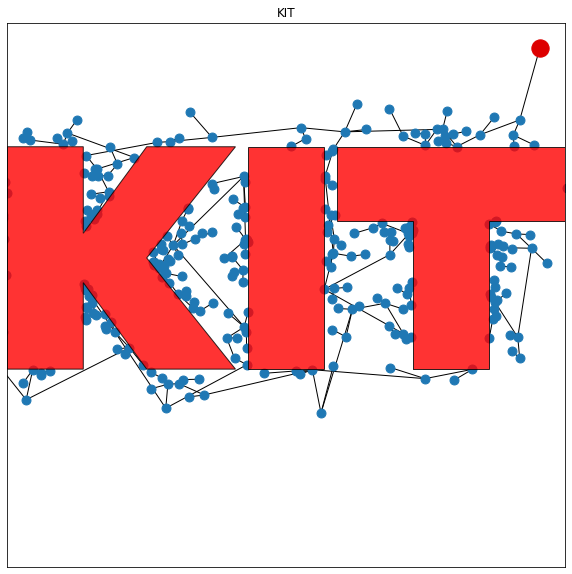

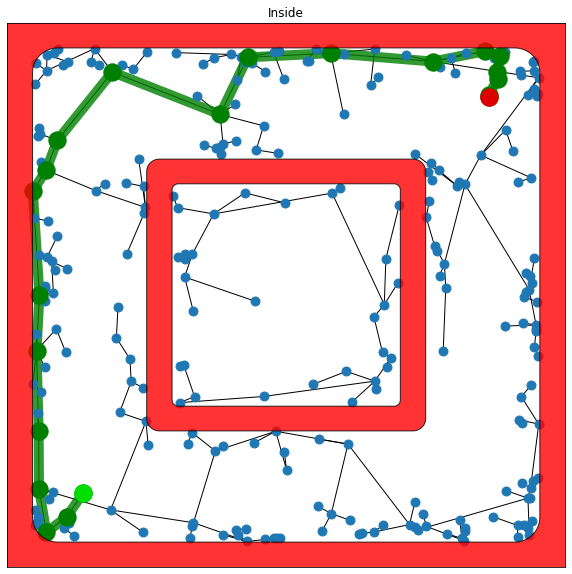

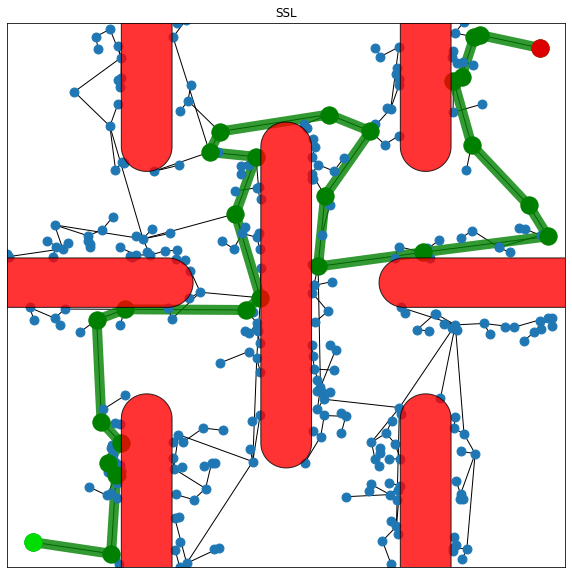

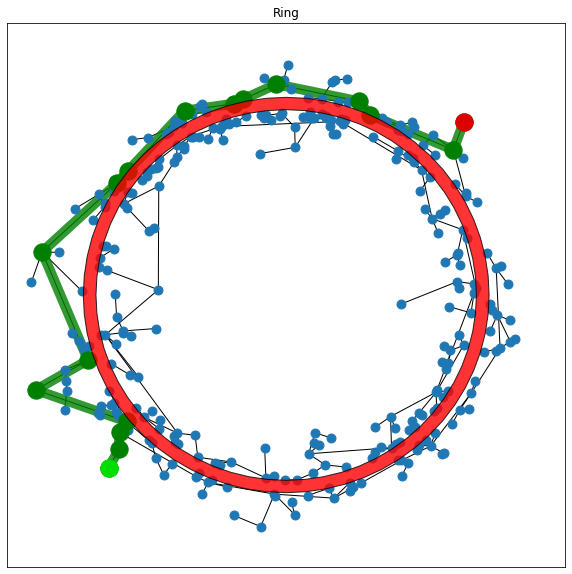

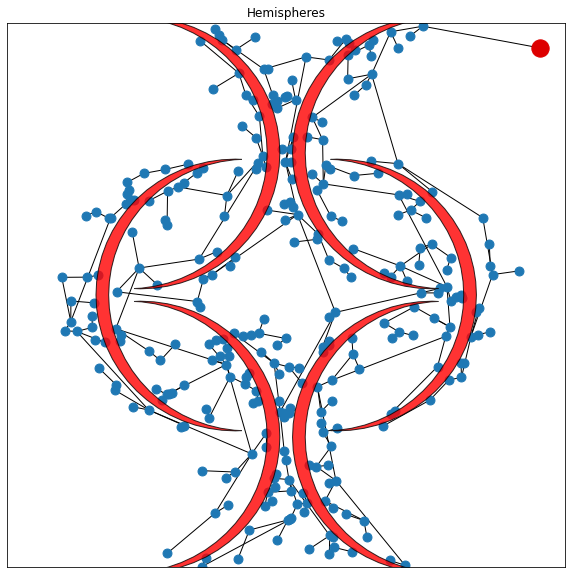

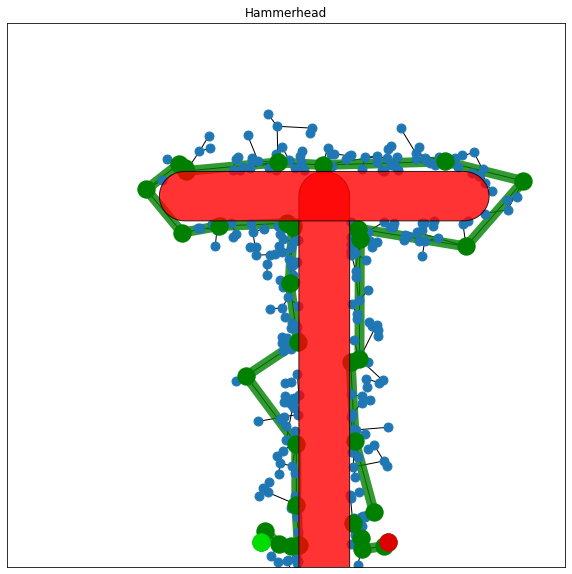

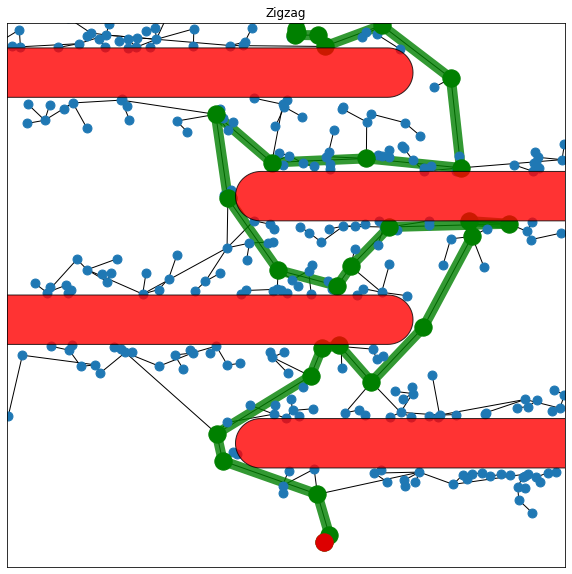

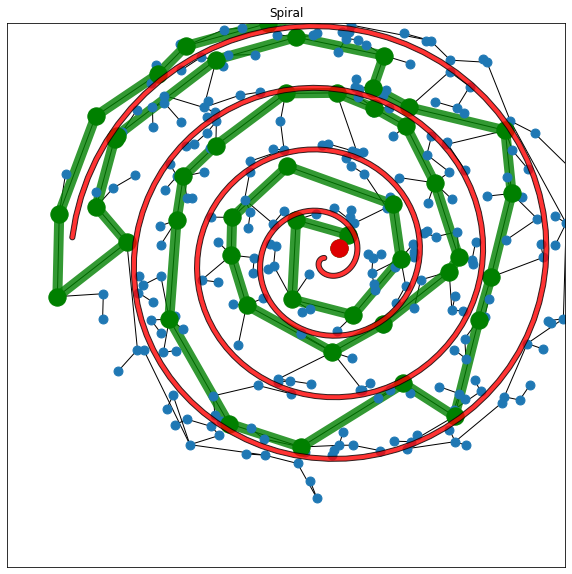

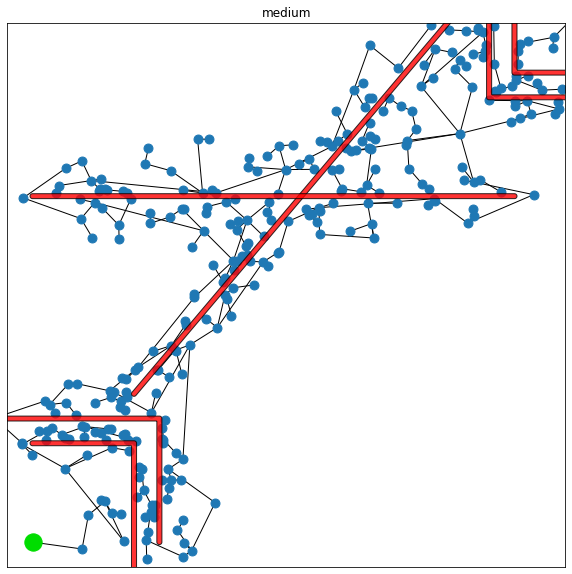

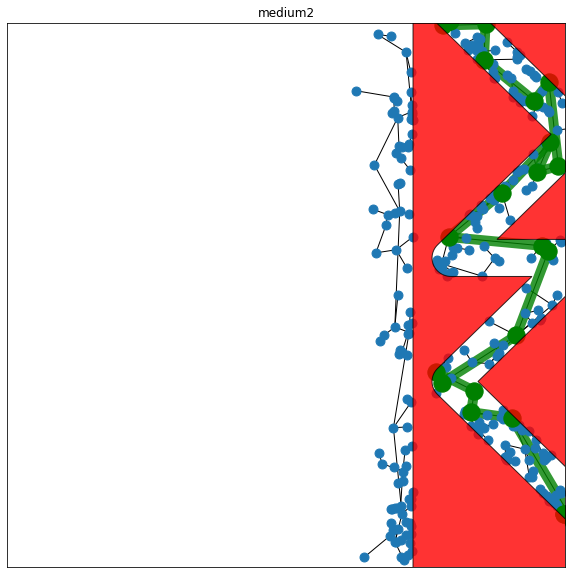

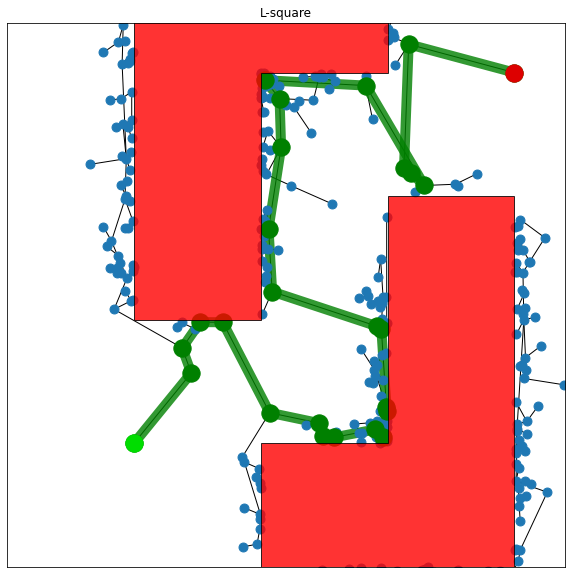

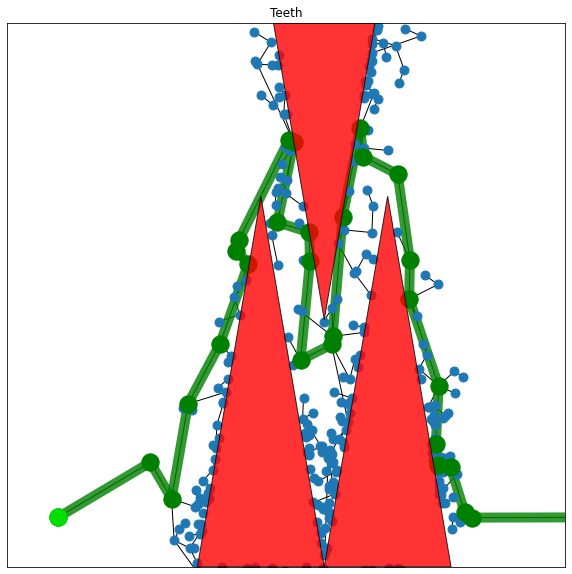

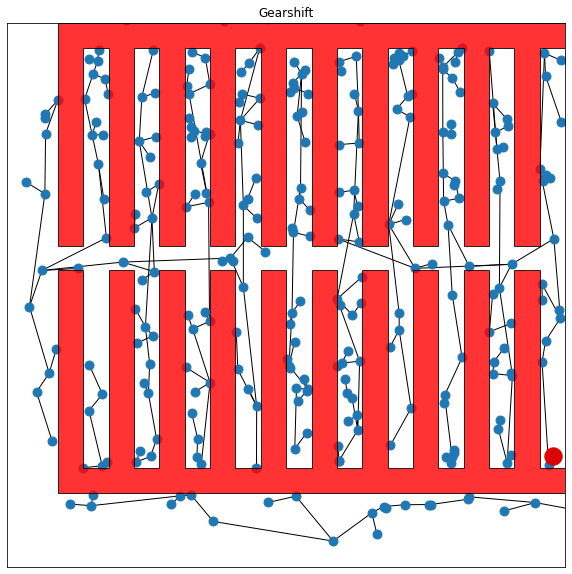

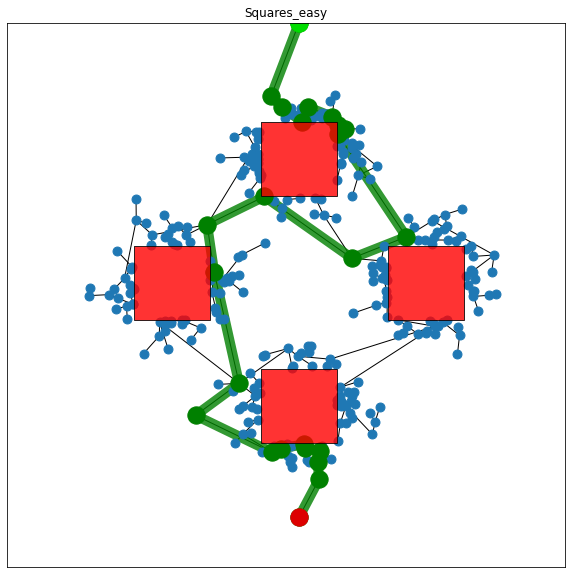

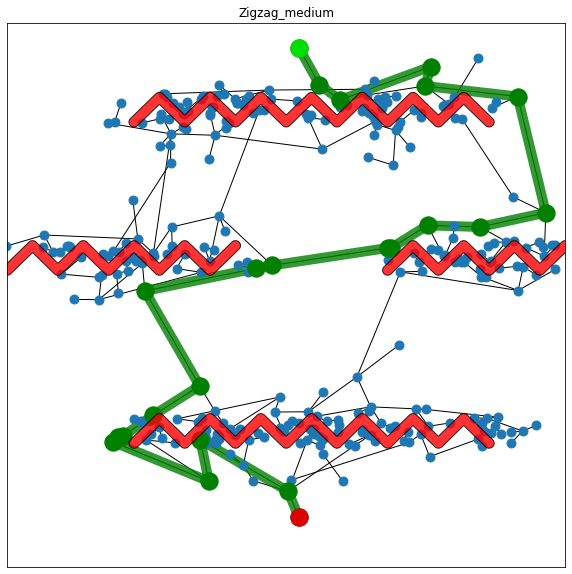

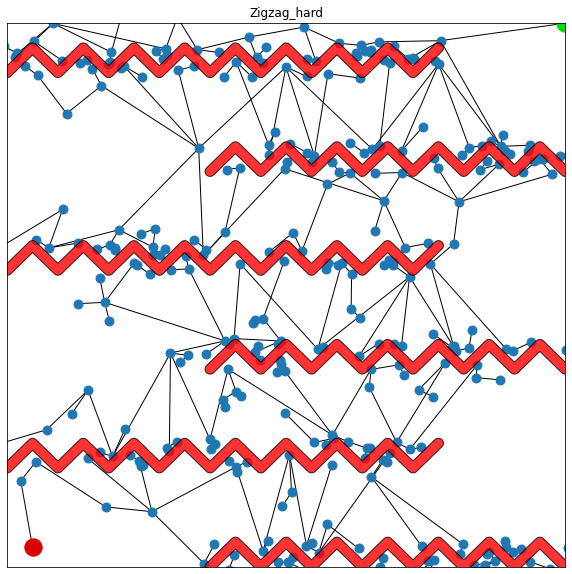

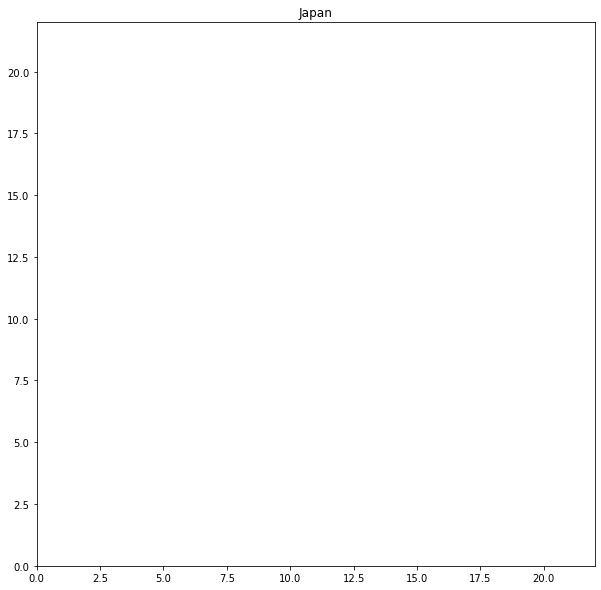

In [3]:
temp_list=IPTestSuite.benchList[5:]

config = {}
config['radius'] = 5.0
config['numNodes'] = 300

for benchmark in temp_list:
    try:
        print ("Planning: ", benchmark.name)
        collChecker = benchmark.collisionChecker
        gauss = GaussianPRM(collChecker)
        solution = gauss.planPath(benchmark.startList[0],benchmark.goalList[0], config)
        print(solution, len(solution))
        print(len(gauss.graph.nodes()))
    except Exception as e:
        solution = []
        print ("Failed", e)

    # draw the planning
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    limits=collChecker.getEnvironmentLimits()
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_title(benchmark.name)
    basicPRMVisualize(gauss.graph, collChecker,solution,nodeSize=80,ax=ax)